In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from tqdm import tqdm

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 불필요한 부분을 제외하고 crop

In [ ]:
img_path_list = glob.glob('C:/Users/user/Downloads/underdog/*.jpg')
img_path_list[:5]

['C:/Users/user/Downloads/underdog\\10.jpg',
 'C:/Users/user/Downloads/underdog\\100.jpg',
 'C:/Users/user/Downloads/underdog\\1000.jpg',
 'C:/Users/user/Downloads/underdog\\1001.jpg',
 'C:/Users/user/Downloads/underdog\\1002.jpg']

In [ ]:
img = cv2.imread('C:/Users/user/Downloads/underdog/3000.jpg')
img.shape

(1080, 1920, 3)

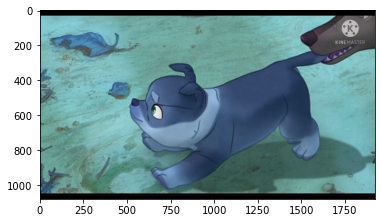

In [ ]:
plt.imshow(img)

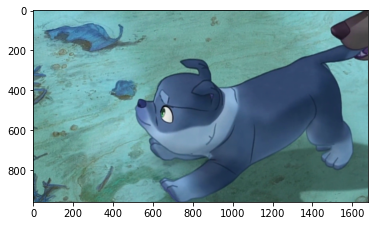

In [ ]:
crop_img = img[60:1020,:1680,:]
plt.imshow(crop_img)

In [ ]:
img_path_list = glob.glob('C:/Users/user/Downloads/underdog/*.jpg')

for img_path in img_path_list:
    img = cv2.imread(img_path)
    img = img[60:1020,:1680,:]
    cv2.imwrite(img_path, img)

# edge smoothing

In [ ]:
img_path_list = glob.glob('C:/Users/user/Downloads/underdog/*.jpg')
save_dir = 'C:/Users/user/Downloads/underdog_smooth'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.uint8)
gauss = cv2.getGaussianKernel(kernel_size, 0)
gauss = gauss * gauss.transpose(1, 0)
count=0

for img_path in tqdm(img_path_list):

    bgr_img = cv2.imread(img_path)
    gray_img = cv2.imread(img_path, 0)
    pad_img = np.pad(bgr_img, ((2, 2), (2, 2), (0, 0)), mode='reflect')
    edges = cv2.Canny(gray_img, 100, 200)
    dilation = cv2.dilate(edges, kernel)

    gauss_img = np.copy(bgr_img)
    idx = np.where(dilation != 0)
    for i in range(np.sum(dilation != 0)):
        gauss_img[idx[0][i], idx[1][i], 0] = np.sum(np.multiply(
            pad_img[idx[0][i]:idx[0][i] + kernel_size, idx[1][i]:idx[1][i] + kernel_size, 0],
            gauss))
        gauss_img[idx[0][i], idx[1][i], 1] = np.sum(np.multiply(
            pad_img[idx[0][i]:idx[0][i] + kernel_size, idx[1][i]:idx[1][i] + kernel_size, 1],
            gauss))
        gauss_img[idx[0][i], idx[1][i], 2] = np.sum(np.multiply(
            pad_img[idx[0][i]:idx[0][i] + kernel_size, idx[1][i]:idx[1][i] + kernel_size, 2],
            gauss))

    cv2.imwrite(f'{save_dir}/{count}.jpg', gauss_img)
    count += 1

100%|████████████████████████████████████████████████████████████████████████████| 2992/2992 [2:06:34<00:00,  2.54s/it]


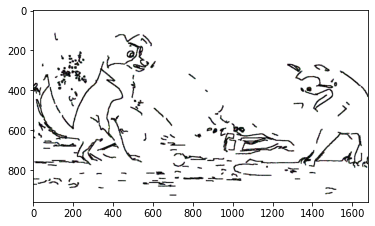

In [ ]:
# 결과가 육안으로 차이가 안나서 확인
a = np.where(bgr_img == gauss_img,1,0)*255
plt.imshow(a)
# 분명 처리되었음

# 모델에 맞는 사이즈로 resize

In [13]:
img = cv2.imread('/content/drive/MyDrive/final_project_sjh/CartoonGan-tensorflow_1/datasets/underdog/trainB/9.jpg')
x = img.shape[1]
y = img.shape[0]
c = (x-y)/2
print(x,y,c)

1680 960 360.0


In [19]:
img_path_list = glob.glob('/content/drive/MyDrive/final_project_sjh/CartoonGan-tensorflow_1/datasets/underdog/trainB_raw/*.jpg')
count = 0
for img_path in tqdm(img_path_list):
  img = cv2.imread(img_path)
  img_crop = img[:, int(c):int(x-c),:]
  img_resize = cv2.resize(img_crop, (256,256))
  cv2.imwrite(f'/content/drive/MyDrive/final_project_sjh/CartoonGan-tensorflow_1/datasets/underdog/trainB/{count}.jpg', img_resize)
  count += 1

100%|██████████| 2992/2992 [13:03<00:00,  3.82it/s]


# smoothing 재 진행

In [20]:
img_path_list = glob.glob('/content/drive/MyDrive/final_project_sjh/CartoonGan-tensorflow_1/datasets/underdog/trainB/*.jpg')
save_dir = '/content/drive/MyDrive/final_project_sjh/CartoonGan-tensorflow_1/datasets/underdog/trainB_smooth'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)


kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.uint8)
gauss = cv2.getGaussianKernel(kernel_size, 0)
gauss = gauss * gauss.transpose(1, 0)


for img_path in tqdm(img_path_list):
    img_num = img_path.split('/')[-1].split('.')[0]
    bgr_img = cv2.imread(img_path)
    gray_img = cv2.imread(img_path, 0)
    pad_img = np.pad(bgr_img, ((2, 2), (2, 2), (0, 0)), mode='reflect')
    edges = cv2.Canny(gray_img, 100, 200)
    dilation = cv2.dilate(edges, kernel)

    gauss_img = np.copy(bgr_img)
    idx = np.where(dilation != 0)
    for i in range(np.sum(dilation != 0)):
        gauss_img[idx[0][i], idx[1][i], 0] = np.sum(np.multiply(
            pad_img[idx[0][i]:idx[0][i] + kernel_size, idx[1][i]:idx[1][i] + kernel_size, 0],
            gauss))
        gauss_img[idx[0][i], idx[1][i], 1] = np.sum(np.multiply(
            pad_img[idx[0][i]:idx[0][i] + kernel_size, idx[1][i]:idx[1][i] + kernel_size, 1],
            gauss))
        gauss_img[idx[0][i], idx[1][i], 2] = np.sum(np.multiply(
            pad_img[idx[0][i]:idx[0][i] + kernel_size, idx[1][i]:idx[1][i] + kernel_size, 2],
            gauss))

    cv2.imwrite(f'{save_dir}/{img_num}.jpg', gauss_img)


100%|██████████| 2992/2992 [23:00<00:00,  2.17it/s]
